In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
# Import necessary tools
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import keras
%matplotlib inline


### Loading and Visualizing Dataset

In [ ]:
train_images=pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/TrainImages .csv",header=None).to_numpy()


In [ ]:
train_images.shape

(13440, 1024)

In [ ]:
test_images=pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/TestImages.csv",header=None).to_numpy()


In [ ]:
train_labels=pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/TrainLabel.csv",header=None).to_numpy()-1

In [ ]:
test_labels=pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/TestLabel.csv",header=None).to_numpy()-1


In [ ]:
len(test_images),len(train_images),len(test_labels),len(train_labels)

(3360, 13440, 3360, 13440)

### Preparing Training and Validation data

In [ ]:
test_labels.shape,train_images.shape,test_images.shape,train_labels.shape

((3360, 1), (13440, 1024), (3360, 1024), (13440, 1))

In [ ]:
train_images = train_images.reshape(-1,32,32,1)
test_images = test_images.reshape(-1,32,32,1)

train_images = train_images / 255.0
test_images = test_images / 255.0

print(train_images.shape, test_images.shape)

(13440, 32, 32, 1) (3360, 32, 32, 1)


In [ ]:
def row_calculator(number_of_images, number_of_columns):
    if number_of_images % number_of_columns != 0:
        return (number_of_images / number_of_columns)+1
    else:
        return (number_of_images / number_of_columns)

In [ ]:
def display_image(x, img_size, number_of_images):
    plt.figure(figsize = (8, 7))
    if x.shape[0] > 0:
        n_samples = int(x.shape[0]/4)
        x = x.reshape(n_samples, img_size, img_size)
        number_of_rows = row_calculator(number_of_images, 4)
        for i in range(number_of_images):
            plt.subplot(number_of_rows, 4, i+1)
            plt.imshow(x[i])

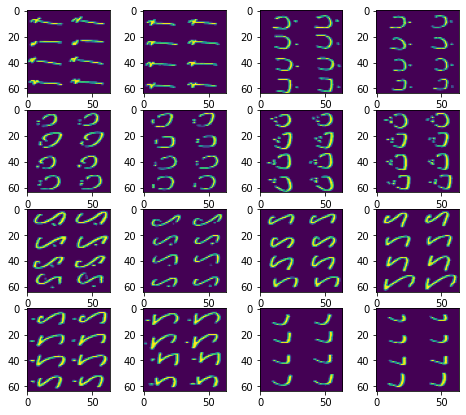

In [ ]:
display_image(train_images, 64,16)
plt.show()


In [ ]:
arabic_characters = ['Alef', 'Beh', 'Teh', 'Theh', 'Jeem', 'Hah', 'khah', 'Dal', 'Thal',
                    'Reh', 'Zain', 'Seen', 'Cheen', 'Sad', 'Daad', 'Tah', 'Zeh', 'Ain',
                    'Ghain', 'Feh', 'Gaf', 'Kaf', 'Lam', 'Meem', 'Noon', 'Heh', 'WOW', 'Yeh']


In [ ]:
# Converting the class vector in integers to binary class matrix
from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels.shape, test_labels.shape)
for i in zip(train_labels[0], arabic_characters):
    print(i)

(13440, 28) (3360, 28)
(1.0, 'Alef')
(0.0, 'Beh')
(0.0, 'Teh')
(0.0, 'Theh')
(0.0, 'Jeem')
(0.0, 'Hah')
(0.0, 'khah')
(0.0, 'Dal')
(0.0, 'Thal')
(0.0, 'Reh')
(0.0, 'Zain')
(0.0, 'Seen')
(0.0, 'Cheen')
(0.0, 'Sad')
(0.0, 'Daad')
(0.0, 'Tah')
(0.0, 'Zeh')
(0.0, 'Ain')
(0.0, 'Ghain')
(0.0, 'Feh')
(0.0, 'Gaf')
(0.0, 'Kaf')
(0.0, 'Lam')
(0.0, 'Meem')
(0.0, 'Noon')
(0.0, 'Heh')
(0.0, 'WOW')
(0.0, 'Yeh')


In [ ]:
from keras.layers import MaxPooling2D,Input
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.models import Model

def get_model():
    In = Input(shape=(32,32,1))
    x = Conv2D(32, (5,5), padding="same", activation="relu")(In)
    x = Conv2D(32, (5,5), activation="relu")(x)
    x = Conv2D(32, (5,5), activation="relu")(x)
    x = MaxPooling2D((2,2))(x)
    x = BatchNormalization()(x)
    
    x = Conv2D(64, (5,5), padding="same", activation="relu")(x)
    x = Conv2D(64, (5,5), activation="relu")(x)
    x = Conv2D(64, (5,5), activation="relu")(x)
    x = MaxPooling2D((2,2))(x)
    x = BatchNormalization()(x)
    
    x = Flatten()(x)
    x = Dense(128, activation="relu")(x)
    x = Dense(128, activation="relu")(x)
    x = Dropout(0.5)(x)
    
    Out = Dense(28, activation="softmax")(x)
    
    model = Model(In, Out)
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    return model




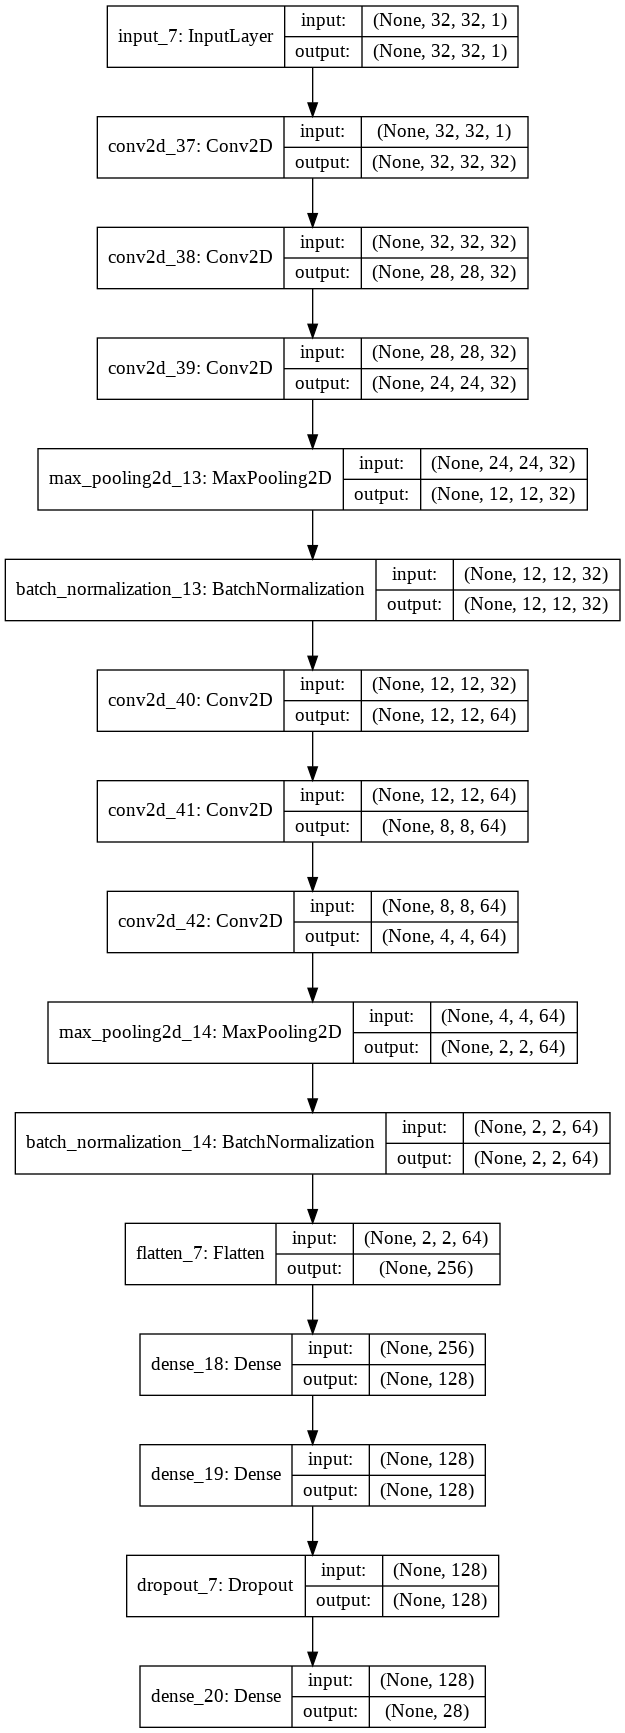

In [ ]:
model = get_model()
keras.utils.vis_utils.plot_model(model, show_shapes=True, show_layer_names=True)

### Define Epochs
Patch size

In [ ]:
epochs = 200  # for better result increase the epochs
batch_size=32 #@param {type:'slider',min:30,max:1000,steps:100}

##To avoid overfitting problem, we need to expand artificially our handwritten digit dataset

* To avoid overfitting problem, we need to expand artificially our handwritten  dataset
* Alter the training data with small transformations to reproduce the variations of digit.
* For example, the number is not centered The scale is not the same (some who write with big/small numbers) The image is rotated.

###Train Test Split
* We split the data into train and test sets.
* test size is 10%.
* train size is 90%.

In [ ]:
img_size=1000 #@param {type:'slider',min:1000,max:10000,steps:1000}

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(train_images, train_labels, 
                                                  test_size = 0.1, 
                                                  random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (12096, 32, 32, 1)
x_test shape (1344, 32, 32, 1)
y_train shape (12096, 28)
y_test shape (1344, 28)


# data augmentation
To prevent overvietting

In [ ]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.5,  # randomly shift images horizontally 5%
        height_shift_range=0.5,  # randomly shift images vertically 5%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


train_gen = datagen.flow(X_train, Y_train, batch_size=batch_size)
test_gen = datagen.flow(test_images, test_labels, batch_size=batch_size)

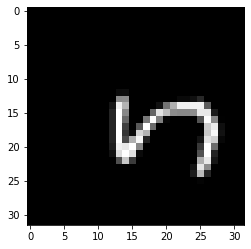

In [ ]:
 # Some examples
plt.imshow(X_train[1][:,:,0],cmap='gray')
plt.show()

In [ ]:
model_checkpoint_callback = ModelCheckpoint(
    filepath="best.hdf5",
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    mode='max')

In [ ]:
# Fit the model

history = model.fit_generator(train_gen, 
                              epochs = epochs, 
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = X_val.shape[0] // batch_size,
                              callbacks=[model_checkpoint_callback])

Epoch 1/200
378/378 [==============================] - 6s 17ms/step - loss: 3.3554 - accuracy: 0.0447 - val_loss: 3.5381 - val_accuracy: 0.0357

Epoch 00001: val_accuracy improved from -inf to 0.03571, saving model to best.hdf5
Epoch 2/200
378/378 [==============================] - 6s 15ms/step - loss: 3.2503 - accuracy: 0.0623 - val_loss: 3.2941 - val_accuracy: 0.0632

Epoch 00002: val_accuracy improved from 0.03571 to 0.06324, saving model to best.hdf5
Epoch 3/200
378/378 [==============================] - 6s 15ms/step - loss: 3.1043 - accuracy: 0.0805 - val_loss: 2.9264 - val_accuracy: 0.0952

Epoch 00003: val_accuracy improved from 0.06324 to 0.09524, saving model to best.hdf5
Epoch 4/200
378/378 [==============================] - 6s 15ms/step - loss: 2.9743 - accuracy: 0.0959 - val_loss: 3.0908 - val_accuracy: 0.0744

Epoch 00004: val_accuracy did not improve from 0.09524
Epoch 5/200
378/378 [==============================] - 6s 15ms/step - loss: 2.8483 - accuracy: 0.1184 - val_lo

In [ ]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='Same',
                 activation='relu',
                 input_shape=(32,32,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(28, activation = "softmax"))

### Define Optimizer
Adam optimizer: Change the learning rate *italicized text*

In [ ]:
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [ ]:
# Compile the model
model.compile(optimizer = optimizer ,
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
epochs = 10  # for better result increase the epochs
batch_size = 250

### Data **Augmentation**

In [ ]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.5,  # randomly shift images horizontally 5%
        height_shift_range=0.5,  # randomly shift images vertically 5%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)


In [ ]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, 
                              validation_data = (X_val,Y_val), 
                              steps_per_epoch=X_train.shape[0] )

In [ ]:
val_data=datagen.flow(X_val, Y_val, batch_size=batch_size)


In [ ]:
val_data

### Evaluate the model
* Test Loss visualization
* Confusion matrix

In [ ]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend();

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["accuracy","val_accuracy"])
plt.show()

In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

In [ ]:
# First prediction
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {arabic_characters[np.argmax(predictions[index])]}")

[3.9287138e-09 9.0609959e-05 5.9791935e-05 3.4816578e-05 2.1029205e-06
 1.4303841e-07 1.3077063e-07 6.5486561e-10 4.9062468e-08 9.4687383e-11
 4.4795264e-08 6.9599599e-01 2.2201964e-01 4.5883019e-02 1.8170707e-02
 1.3703992e-07 1.7274247e-06 1.3623884e-06 1.4235471e-07 4.2579658e-04
 3.1924483e-03 2.6801307e-04 6.4908145e-03 1.5387290e-06 5.2211196e-03
 2.4773978e-09 3.9061770e-10 2.1398251e-03]
Max value (probability of prediction): 0.6959959864616394
Sum: 1.0
Max index: 11
Predicted label: Seen


In [ ]:
arabic_characters[11]

'Seen'

In [ ]:
import tensorflow as tf
print("Creating validation data batches...")
data = tf.data.Dataset.from_tensor_slices((tf.constant(train_images), # filepaths
                                               tf.constant(train_labels))) # labels
val_data = data.map(get_image_label).batch(batch_size)

Creating validation data batches...


In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image,label):
  """
  Takes an image file path name and the assosciated label,
  processes the image and reutrns a typle of (image, label).
  """
  image=tf.image.resize(image,size=[32,32])

  return image,label

In [ ]:
# we need to transpose the image for visualization
# since for training there is no problem we gave the data as it was
plt.figure()
plt.subplot(1,2,1)
plt.imshow(test_images[0].reshape(32,32))
plt.axis("off")
plt.title("from dataset")
plt.subplot(1,2,2)
plt.imshow(test_images[0].reshape(32,32).T)
plt.axis("off")
plt.title("with Transpose")
plt.show()


### Testing our model

In [ ]:
import cv2
def get_sides(length):
    if length%2==0:
        return length//2,length//2
    else:
        return (length-1)//2,1+(length-1)//2
    
    
def preprocess(character):
    if len(character.shape)<2:
        character = cv2.cvtColor(word, cv2.COLOR_BGR2GRAY)

    (wt, ht) = (32,32)
    (h, w) = character.shape
    fx = w / wt
    fy = h / ht
    f = max(fx, fy)
    newSize = (max(min(wt, int(w / f)), 1), max(min(ht, int(h / f)), 1)) 
    character = cv2.resize(character, newSize)

    if character.shape[0] < 32:
        add_zeros_up = np.zeros((get_sides(32-character.shape[0])[0], character.shape[1]))
        add_zeros_down = np.zeros((get_sides(32-character.shape[0])[1], character.shape[1]))
        character = np.concatenate((add_zeros_up,character))
        character = np.concatenate((character, add_zeros_down))

    if character.shape[1] < 32:
        add_zeros_left = np.zeros((32, get_sides(32-character.shape[1])[0]))
        add_zeros_right = np.zeros((32, get_sides(32-character.shape[1])[1]))
        
        character = np.concatenate((add_zeros_left,character), axis=1)
        character = np.concatenate((character, add_zeros_right), axis=1)


    character= character.T/255.0
    character = np.expand_dims(character , axis = 2)
    return character

def get_characters(img,kv=5):
    gray = img.copy()

    kernel = np.ones((kv,kv),dtype=np.uint8)
    if len(img.shape)==3:
        gray = cv2.cvtColor(gray,cv2.COLOR_BGR2GRAY)
        
    _, thresh = cv2.threshold(gray,127,255, cv2.THRESH_BINARY_INV)
    imgdilation = cv2.dilate(thresh,kernel, iterations=1)
    ctrs, _= cv2.findContours(imgdilation.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    sorted_ctrs = sorted(ctrs,key = lambda ctr: cv2.boundingRect(ctr)[0])
    sorted_ctrs = sorted_ctrs[::-1]
    characters=[]
    for ctr in sorted_ctrs:
        x, y, w, h = cv2.boundingRect(ctr)

        acharacter = 255-np.array(img[y:y+h,x:x+w])
        acharacter = preprocess(acharacter)
        characters.append(acharacter)
    
    return characters,sorted_ctrs

In [ ]:
page = cv2.imread('/content/drive/My Drive/Colab Notebooks/data/all.png',cv2.IMREAD_GRAYSCALE)
characters = get_characters(page,30)[1]
for ctr in characters:
        x, y, w, h = cv2.boundingRect(ctr)

        acharacter = 255-np.array(page[y:y+h,x:x+w])
        acharacter = preprocess(acharacter)
        acharacter = acharacter.reshape(32,32,1)
        pred = model.predict([[acharacter]])
        page = cv2.rectangle(page, (x, y), (x + w, y + h), (36,255,12), 1)
        cv2.putText(page, arabic_characters[np.argmax(pred)], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
plt.figure(figsize=(5,5))
plt.imshow(page)
plt.axis("OFF")
plt.show()


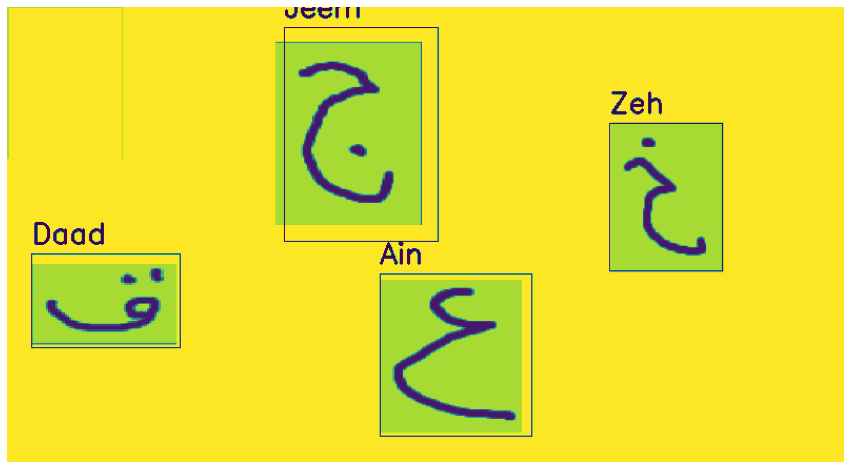

In [ ]:
page = cv2.imread('/content/drive/My Drive/Colab Notebooks/data/all.png',cv2.IMREAD_GRAYSCALE)
characters = get_characters(page,30)[1]
for ctr in characters:
        x, y, w, h = cv2.boundingRect(ctr)

        acharacter = 255-np.array(page[y:y+h,x:x+w])
        acharacter = preprocess(acharacter)
        acharacter = acharacter.reshape(32,32,1)
        pred = model.predict([[acharacter]])
        page = cv2.rectangle(page, (x, y), (x + w, y + h), (36,255,12), 1)
        cv2.putText(page, arabic_characters[np.argmax(pred)], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
plt.figure(figsize=(15,10))
plt.imshow(page)
plt.axis("OFF")
plt.show()


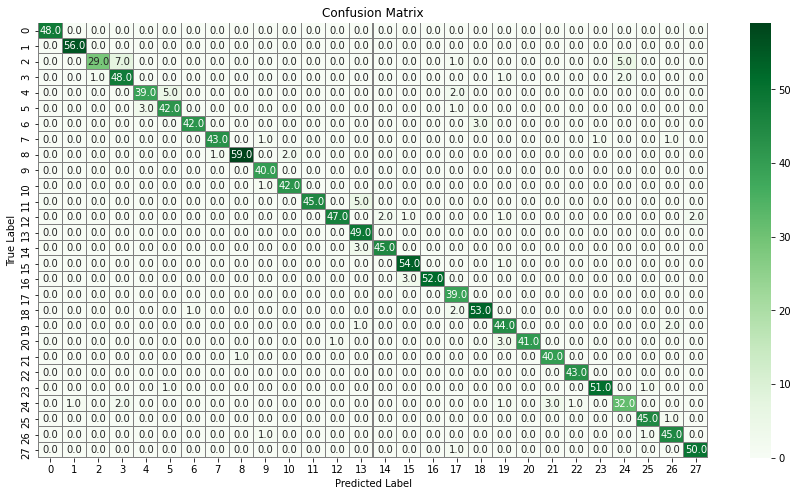

In [ ]:
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(15, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix");

In [ ]:
def test_model(file_path):
  characters = get_characters(cv2.imread(file_path,cv2.IMREAD_GRAYSCALE),30)[0]
  characters=np.array(characters).reshape(-1,32,32,1)
  preds = model.predict(characters)
  for img, pred in zip(characters, preds):
        plt.figure(figsize=(1,1))
        plt.imshow(img.reshape(32,32).T)
        plt.title(arabic_characters[pred.argmax()])
        plt.axis('off')
        plt.show()

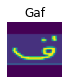

In [ ]:
test_model("/content/drive/My Drive/Colab Notebooks/data/qaf.png")

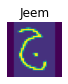

In [ ]:
test_model('/content/drive/My Drive/Colab Notebooks/data/jeem.png')

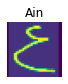

In [ ]:
test_model('/content/drive/My Drive/Colab Notebooks/data/ain.png')